# Introduction to Machine Learning

* AI
    * Weak AI 
        * Symbolic
            * rules are symbolic tests 
        * Statistical (Machine Learning)
            * rules are statistical tests

In [45]:
X_big = [
    [1, 2],
    [2, 4],
    [3, 6],
]

In [46]:
X_small = [1, 2, 3]
decompress = 2

## Machine Learning

* computational statistical inference
* two forms
    * supervised = prediction
        * parametric = know the shape of the solution
        * non-parameric = machine finds the shape
    * unsupervised = characterising the things you know
        * clustering
            * clusters = groups
            * how many groups there are
            * what points would be charateristic of those groups
        * compression
            * large amount of data -> smaller amount
            * method
                * 1. characterise the data 
                * 2. remove data ensuring the smaller dataset is still characteristic
            

## Supervised Learning

* historical dataset
    * $(X, y)$
* X
    * always-observable "features"
* y
    * future unobservable prediction "target"
    * historically observed
    
* "learning"
    * automatically determining a calculative relationship
    * $ y =  f(x)$
    * $y$ can be computed from $x$
    * automated derivation of $f$ *from data*
* aside:
    * learning in this sense *cannot* simulate alternatives

In [1]:
import seaborn as sns

In [7]:
tip_history = sns.load_dataset('tips')
tip_history.sample(3)

,total_bill,tip,sex,smoker,day,time,size
163,13.81,2.0,Male,No,Sun,Dinner,2
100,11.35,2.5,Female,Yes,Fri,Dinner,2
227,20.45,3.0,Male,No,Sat,Dinner,4


In [8]:
X = tip_history[['total_bill', 'size']]

In [9]:
y = tip_history['tip']

In [11]:
from sklearn.linear_model import LinearRegression

### The Machine Learning Step

The `.fit()` command considers the historical $(X, y)$ and produces a model from them...

In [12]:
f_model = LinearRegression().fit(X, y)

We can use this model to predict, 

In [47]:
f_model.predict([
    [30, 2], #total_bill = 30, size = 2
    [80, 5]
])

array([3.83554043, 9.04900066])

And draw the predictions as a line if we wish,

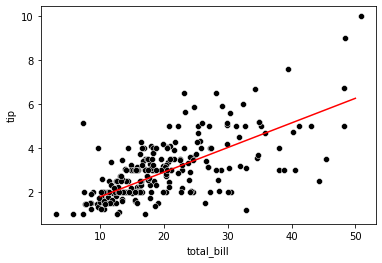

In [19]:
sns.scatterplot(data=tip_history, x='total_bill', y='tip', color="black")

sns.lineplot(
    x=[10, 20, 30, 40, 50],
    y=f_model.predict([[10, 1], [20, 2], [30, 3], [40, 4], [50, 5]]),
    color="red"
)

## Parametric vs. Non-Parametric Learning

Above we knew that any solution would be a straight line. We can also ask the machine to infer the shape of the line itself,

In [20]:
from sklearn.neighbors import KNeighborsRegressor

This is the machine learning step,

In [22]:
g_model = KNeighborsRegressor().fit(X, y)

Here we visualize the solution,

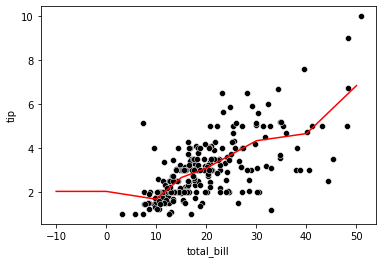

In [27]:
sns.scatterplot(data=tip_history, x='total_bill', y='tip', color="black")

sns.lineplot(
    x=[-10, 0, 10, 15, 20, 30, 40, 50],
    y=g_model.predict([[-10, 0], [0,1], [10, 1], [15,1], [20, 2], [30, 3], [40, 4], [50, 5]]),
    color="red"
)

In this case the machine is doing all of the work. It has to take the data points *literally* and use their structure to draw a best-guess line through "their centre".

A machine using these methods *cannot* distinguish between noise and signal. So, *necessarily* any such line will be over-fit to randomness. 

Ie., this model very often non-physical.

Non-physical, def. there are points on the line which are impossible to observe.

Eg., consider the being no people in the group and the bill being $-\$10$

Parametric methods (ie., where we know the shape before hand) are less likely to result in these problems.

## Unsupervised

* historical dataset
* $(X,)$
* automatically deriving information from $X$
    * ie., $P(X|...) = f(X)$
* in the future, we can just observe the "answer"
    * so this isn't prediction

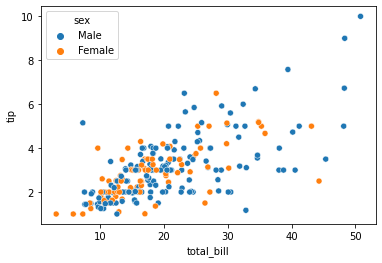

In [28]:
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='sex')

In [32]:
flowers = sns.load_dataset('iris')

flowers.sample(2)

,sepal_length,sepal_width,petal_length,petal_width,species
20,5.4,3.4,1.7,0.2,setosa
86,6.7,3.1,4.7,1.5,versicolor


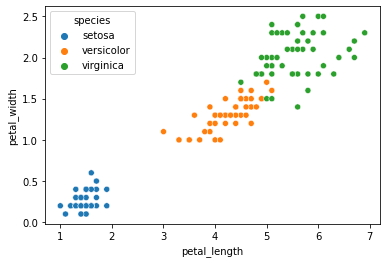

In [34]:
sns.scatterplot(data=flowers, x='petal_length', y='petal_width', hue='species')

In [35]:
from sklearn.cluster import KMeans

In [38]:
X_flower = flowers[['petal_length', 'petal_width']]

flower_model = KMeans(3).fit(X_flower)

In [39]:
flower_model.cluster_centers_

array([[5.59583333, 2.0375    ],
       [1.462     , 0.246     ],
       [4.26923077, 1.34230769]])

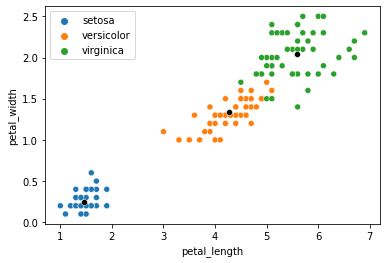

In [41]:
sns.scatterplot(data=flowers, x='petal_length', y='petal_width', hue='species')

sns.scatterplot(x=flower_model.cluster_centers_[:, 0], y=flower_model.cluster_centers_[:, 1], color="black")


In [44]:
flowers.loc[ flowers['species'] == 'setosa', ['petal_length', 'petal_width']].mean()

petal_length    1.462
petal_width     0.246
dtype: float64